In [61]:
# Import relevant library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Read the dataset
data = pd.read_csv('titanic-passengers.csv',sep=';')

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [30]:
num = data.select_dtypes('number')
cat = data.select_dtypes('object')

In [31]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
for i in data.columns:
    if i in num.columns:
        data[i] = data[i].fillna(data[i].mean())
    else:
        data[i] = data[i].fillna(data[i].mode()[0])

In [33]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [34]:
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [36]:
# Label Enconding
enconder = LabelEncoder()

for i in data.columns:
    if i in cat.columns:
        data[i] = enconder.fit_transform(data[i])

In [37]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,1,28.0,0,0,13.0000,47,2
1,0,3,1,25.0,0,0,7.6500,140,2
2,0,3,1,20.0,0,0,7.8542,47,2
3,0,3,0,29.0,0,4,21.0750,47,2
4,0,1,1,31.0,1,0,52.0000,38,2


In [38]:
# Select Feature and Target variables
x = data.drop('Survived', axis=1)
y = data['Survived']

In [51]:
# Splitting data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [40]:
# Initialize the model
model = DecisionTreeClassifier()

In [41]:
# Fit the model to the training data set
model.fit(x_train,y_train)

DecisionTreeClassifier()

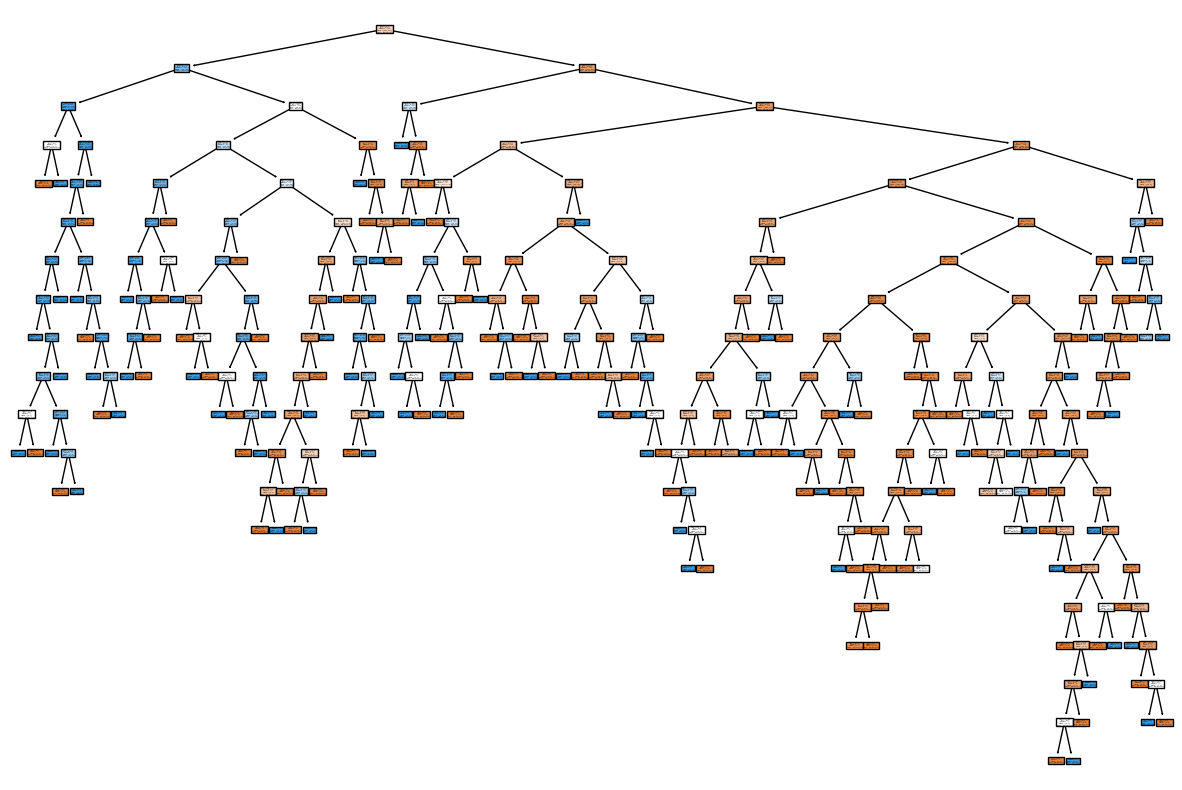

In [44]:
# Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True, feature_names=x.columns,class_names=['Not Survived','Survived'])
plt.show()

In [56]:
# Initialize with a different parameter
model_new = DecisionTreeClassifier(max_depth=5,min_samples_split=10)
model_new.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [58]:
# Prediction using the original model
y_pred = model.predict(x_test)
acc_original = accuracy_score(y_test,y_pred)

In [59]:
# Predictions using the model with changed parameters
y_pred_new = model_new.predict(x_test)
acc_new = accuracy_score(y_test,y_pred_new)

In [60]:
print(f'Original Accuracy is {acc_original}')
print(f'New Accuracy is {acc_new}')

Original Accuracy is 0.776536312849162
New Accuracy is 0.8044692737430168


The original accuracy was 0.7765, and the new accuracy is 0.8045, indicating an improvement in predictive performance.

In [65]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [66]:
rf_y_pred = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, rf_y_pred)

In [68]:
print(f'Random Forest Accuracy is {rf_acc}')

Random Forest Accuracy is 0.7932960893854749


The Random Forest model achieved an accuracy of approximately 0.7933 on the test set. This accuracy is between the original decision tree accuracy (0.7765) and the accuracy of the decision tree with adjusted parameters (0.8045). Random Forests often perform well due to their ability to reduce overfitting and capture more complex patterns in the data by combining multiple decision trees. In this case, it seems to have performed slightly better than the original decision tree but slightly worse than the decision tree with adjusted parameters.
